# Part 1:

WPPOOL is a rapidly growing startup specializing in the development of high-quality WordPress plugins and themes. Their products, such as WP Dark Mode, Google Sheets to WP Table Live Sync, and Easy Video Reviews, are designed to enhance website functionality and user experience. Their clients include website owners, developers, and businesses seeking to improve their WordPress sites with innovative solutions. With over 24,000 active users and a versatile team, they are committed to crafting unique products that address specific pain points, ensuring optimized performance and regular updates.

    

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Exploaration and Cleaning

In [3]:
df = pd.read_csv("wppool_growth_data_sample_20k.csv")

In [4]:
df

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,NaN,NaN,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,NaN,NaN,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            20000 non-null  int64 
 1   install_date       20000 non-null  object
 2   last_active_date   20000 non-null  object
 3   subscription_type  20000 non-null  object
 4   country            20000 non-null  object
 5   total_sessions     20000 non-null  int64 
 6   page_views         20000 non-null  int64 
 7   download_clicks    20000 non-null  int64 
 8   activation_status  20000 non-null  int64 
 9   days_active        20000 non-null  int64 
 10  pro_upgrade_date   4029 non-null   object
 11  plan_type          4029 non-null   object
 12  monthly_revenue    20000 non-null  int64 
 13  churned            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


In [6]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [7]:
# Checking for missing data
missing_values = df.isnull().sum()
missing_values

user_id                  0
install_date             0
last_active_date         0
subscription_type        0
country                  0
total_sessions           0
page_views               0
download_clicks          0
activation_status        0
days_active              0
pro_upgrade_date     15971
plan_type            15971
monthly_revenue          0
churned                  0
dtype: int64

In [8]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [9]:
# checking data types of column
df.dtypes

user_id               int64
install_date         object
last_active_date     object
subscription_type    object
country              object
total_sessions        int64
page_views            int64
download_clicks       int64
activation_status     int64
days_active           int64
pro_upgrade_date     object
plan_type            object
monthly_revenue       int64
churned               int64
dtype: object

In [10]:
# checking for inconsistency data
categorical_columns = ['install_date','last_active_date','subscription_type', 'country','pro_upgrade_date','plan_type']
inconsistencies = {col: df[col].value_counts() for col in categorical_columns}
inconsistencies

{'install_date': 8/13/2023     83
 3/5/2023      75
 1/29/2023     74
 9/27/2023     73
 6/8/2023      71
               ..
 10/18/2023    39
 7/26/2023     36
 12/30/2023    36
 3/23/2023     35
 9/6/2023      35
 Name: install_date, Length: 366, dtype: int64,
 'last_active_date': 1/1/2024      328
 12/31/2023    320
 12/29/2023    253
 12/30/2023    239
 12/27/2023    232
              ... 
 1/16/2023       1
 1/8/2023        1
 1/17/2023       1
 1/12/2023       1
 1/22/2023       1
 Name: last_active_date, Length: 357, dtype: int64,
 'subscription_type': Free    15971
 Pro      4029
 Name: subscription_type, dtype: int64,
 'country': India        2914
 Canada       2899
 UK           2869
 France       2849
 USA          2848
 Germany      2832
 Australia    2789
 Name: country, dtype: int64,
 'pro_upgrade_date': 12/31/2023    73
 12/30/2023    60
 1/1/2024      55
 12/26/2023    53
 12/28/2023    49
               ..
 3/25/2023      1
 1/8/2023       1
 2/6/2023       1
 2/19/2023

#### Explain how you handled missing data and why you chose that method:
In this dataset, missing data was primarily present in the 'pro_upgrade_date' and 'plan_type' columns.
Dropped Rows with Missing Values: I chose to drop rows with missing values in these columns ('pro_upgrade_date' and 'plan_type').
Imputation (Filling Missing Values): In cases like this, imputing the missing values could lead to misleading results, as users who haven't upgraded may be treated as having a default upgrade date or plan, which wouldn't reflect the reality of the data.
Row Deletion: By deleting rows with missing values in these columns, the remaining data retains its integrity and is consistent with the analysis objectives. This method avoids introducing potential bias into the dataset

In [11]:
# Filling rows where 'pro_upgrade_date' or 'plan_type' are missing:
df.fillna(0, inplace=True)
df
# # Ensure that the data is cleaned properly by checking for missing values:
# missing_values = df.isnull().sum()

# # Display the cleaned data and missing values summary:
# print("Missing Values After Cleaning:")
# missing_values


,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,0,0,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,0,0,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,0,0,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,0,0,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,0,0,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0


In [12]:
df

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,0,0,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,0,0,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,0,0,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,0,0,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,0,0,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0


#### Provide a summary of the dataset, including the distribution of Free vs. Pro users:

In [13]:
df.describe(include='all')

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
count,20000.000000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.000000,20000.000000
unique,NaN,366,357,2,7,NaN,NaN,NaN,NaN,NaN,338.0,4.0,NaN,NaN
top,NaN,8/13/2023,1/1/2024,Free,India,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
freq,NaN,83,328,15971,2914,NaN,NaN,NaN,NaN,NaN,15971.0,15971.0,NaN,NaN
mean,10000.500000,NaN,NaN,NaN,NaN,91.914500,276.308900,0.102250,0.990550,91.28080,NaN,NaN,11.774050,0.285250
std,5773.647028,NaN,NaN,NaN,NaN,62.523862,244.775351,0.302984,0.096753,80.67644,NaN,NaN,26.845358,0.451545
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.00000,NaN,NaN,0.000000,0.000000
25%,5000.750000,NaN,NaN,NaN,NaN,44.000000,96.000000,0.000000,1.000000,24.00000,NaN,NaN,0.000000,0.000000
50%,10000.500000,NaN,NaN,NaN,NaN,85.000000,208.000000,0.000000,1.000000,68.00000,NaN,NaN,0.000000,0.000000
75%,15000.250000,NaN,NaN,NaN,NaN,126.000000,396.000000,0.000000,1.000000,140.00000,NaN,NaN,0.000000,1.000000


In [14]:
subscription_distribution = df['subscription_type'].value_counts()
subscription_distribution

Free    15971
Pro      4029
Name: subscription_type, dtype: int64

# 2. User Engagement analysis 

#### Identify the average number of sessions for Free vs. Pro users :

In [15]:
avg_sessions_by_subscription = df.groupby('subscription_type')['total_sessions'].mean()

avg_sessions_by_subscription

subscription_type
Free     76.081210
Pro     154.677836
Name: total_sessions, dtype: float64

#### Find the top 5 most active users based on total sessions.

In [16]:
# Find the top 5 most active users based on total sessions
top_5_active_users = df[['user_id', 'total_sessions']].sort_values(by='total_sessions', ascending=False).head(5)

top_5_active_users

,user_id,total_sessions
15351,15352,300
3965,3966,300
12849,12850,300
12191,12192,300
2456,2457,300


#### Identify the top 5 countries with the highest engagement

In [17]:
# Find the top 5 countries with the highest total sessions (engagement)
top_5_countries = df.groupby('country')['total_sessions'].sum().sort_values(ascending=False).head(5)

top_5_countries

country
India      272202
Germany    266319
Canada     264217
USA        261635
France     259495
Name: total_sessions, dtype: int64

# Churn Analysis

#### Calculate the overall churn rate for Free vs. Pro users

In [18]:
churn_rate_by_subscription = df.groupby('subscription_type')['churned'].mean() * 100

churn_rate_by_subscription


subscription_type
Free    28.595579
Pro     28.245222
Name: churned, dtype: float64

#### Identify the top 3 factors contributing to churn using correlation or regression analysis

In [19]:
# Compute correlation with churned column
correlation_with_churn = df.corr()['churned'].drop('churned').abs().sort_values(ascending=False)

# Get the top 3 factors contributing to churn
top_3_factors = correlation_with_churn.head(3)

top_3_factors

days_active        0.617213
user_id            0.012038
monthly_revenue    0.008328
Name: churned, dtype: float64

#### Compare churn trends between Free and Pro users.


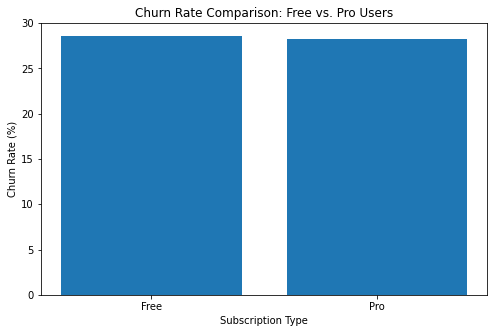

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(churn_rate_by_subscription.index, churn_rate_by_subscription.values)
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate Comparison: Free vs. Pro Users')
plt.show()

# Revenue & Upgrade Trends

#### What percentage of users upgraded from Free to Pro?

In [21]:
total_users = len(df)
upgraded_users = df['pro_upgrade_date'].eq(0).sum()
upgrade_percentage = (upgraded_users / total_users) * 100
print(f"Percentage = {upgrade_percentage} % ")

Percentage = 79.855 % 


In [22]:
df

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,0,0,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,0,0,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,0,0,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,0,0,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,0,0,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0


In [23]:
df['pro_upgrade_date']

0                 0
1                 0
2                 0
3         11/9/2023
4                 0
            ...    
19995             0
19996     9/21/2023
19997             0
19998    12/26/2023
19999             0
Name: pro_upgrade_date, Length: 20000, dtype: object

#### Calculate the total monthly revenue from Pro users

In [24]:
total_monthly_revenue_pro = df[df['subscription_type'] == 'Pro']['monthly_revenue'].sum()

total_monthly_revenue_pro

235481

#### Which Pro plan (Basic, Standard, or Enterprise) contributes the most revenue?


In [25]:
pro_revenue_by_plan = df[df['subscription_type'] == 'Pro'].groupby('plan_type')['monthly_revenue'].sum()
pro_revenue_by_plan
# # Identify the plan contributing the most revenue
# highest_revenue_plan = revenue_by_plan.idxmax()
# highest_revenue_amount = revenue_by_plan.max()

# print(revenue_by_plan, highest_revenue_plan, highest_revenue_amount)


plan_type
Basic         80339
Enterprise    78764
Standard      76378
Name: monthly_revenue, dtype: int64

#### Analyze how long it takes for Free users to upgrade based on country and engagement level.

In [26]:
# Convert date columns to datetime format
df['install_date'] = pd.to_datetime(df['install_date'])
df['pro_upgrade_date'] = pd.to_datetime(df['pro_upgrade_date'])

# Calculate the time taken to upgrade (in days) for Free users who upgraded
df['days_to_upgrade'] = (df['pro_upgrade_date'] - df['install_date']).dt.days

# Filter out users who never upgraded (i.e., NaN values in 'days_to_upgrade')
upgraded_users = df.dropna(subset=['days_to_upgrade'])

# Analyze upgrade time by country
upgrade_time_by_country = upgraded_users.groupby('country')['days_to_upgrade'].mean().sort_values()

# Analyze upgrade time by engagement level (total_sessions)
engagement_levels = pd.qcut(upgraded_users['total_sessions'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
upgrade_time_by_engagement = upgraded_users.groupby(engagement_levels)['days_to_upgrade'].mean()

# # Display results
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Upgrade Time Analysis by Country", dataframe=upgrade_time_by_country.to_frame())
# tools.display_dataframe_to_user(name="Upgrade Time Analysis by Engagement Level", dataframe=upgrade_time_by_engagement.to_frame())
upgrade_time_by_engagement

total_sessions
Low         -17706.728580
Medium      -17192.646796
High        -17244.712034
Very High   -10162.443373
Name: days_to_upgrade, dtype: float64

In [27]:
upgrade_time_by_country

country
Australia   -15730.630333
France      -15638.551773
Canada      -15593.739910
UK          -15589.839665
USA         -15555.126053
India       -15532.632121
Germany     -15462.521893
Name: days_to_upgrade, dtype: float64

# 5. Actionable Growth Recommendations

### Suggest three strategies to reduce churn.

###### 1) If a user from India installs the app but doesn't engage beyond 10 sessions in 30 days, send an automated email series explaining product benefits, case studies, and Pro-exclusive features.
###### 2) If a user from Germany has 150+ sessions but hasn’t upgraded, offer a personalized Pro plan discount based on usage.
###### 3)  If a Pro user in Canada hasn’t logged in for 30 days, send a personalized retention offer, such as an extra month for free or a 1-on-1 call with support.


### Propose two ways to increase Free-to-Pro conversions.

#### 1. Personalized Upgrade Triggers Based on Usage
#### 2. Limited-Time Pro Trials & Exclusive Discounts


#### Identify potential market expansion opportunities based on country trends.

In [28]:
# Analyze user distribution by country
user_count_by_country = df['country'].value_counts()

# Analyze churn rate by country
churn_rate_by_country = df.groupby('country')['churned'].mean() * 100

# Analyze free-to-pro conversion rate by country
total_free_users_by_country = df[df['subscription_type'] == 'Free'].groupby('country').size()
total_pro_users_by_country = df[df['subscription_type'] == 'Pro'].groupby('country').size()

# Calculate conversion rate for each country (handling division by zero)
conversion_rate_by_country = (total_pro_users_by_country / total_free_users_by_country.replace(0, 1)) * 100

# Combine all insights into a single DataFrame
country_analysis = pd.DataFrame({
    'Total Users': user_count_by_country,
    'Churn Rate (%)': churn_rate_by_country,
    'Free-to-Pro Conversion Rate (%)': conversion_rate_by_country
}).fillna(0).sort_values(by='Total Users', ascending=False)

country_analysis

,Total Users,Churn Rate (%),Free-to-Pro Conversion Rate (%)
India,2914,28.551819,25.657611
Canada,2899,29.182477,25.172712
UK,2869,28.720809,25.229158
France,2849,27.799228,24.791940
USA,2848,28.195225,25.462555
Germany,2832,27.789548,26.203209
Australia,2789,29.437074,24.065836


# 6. Conversion Rate Optimization (CRO)


#### If WPPOOL increases the landing page conversion rate by 10%, what would be the estimated impact on Pro upgrades?

In [29]:
# Calculate the total number of free users before the increase
total_free_users = df[df['subscription_type'] == 'Free'].shape[0]

# Calculate the expected increase in free users (10% more due to landing page improvement)
expected_new_free_users = total_free_users * 0.10

# Estimate the additional Pro upgrades using the overall Free-to-Pro conversion rate
overall_conversion_rate = (df['subscription_type'] == 'Pro').mean()  # Current Free-to-Pro conversion rate
expected_additional_pro_upgrades = expected_new_free_users * overall_conversion_rate

# Display results
expected_new_free_users, expected_additional_pro_upgrades

(1597.1000000000001, 321.735795)

 #### Run a simple A/B test simulation (e.g., using a chi-square test) to evaluate conversion optimization

In [30]:
import numpy as np
from scipy.stats import chi2_contingency

# Simulate A/B test groups
np.random.seed(42)  # For reproducibility
df['ab_group'] = np.random.choice(['A', 'B'], size=len(df), p=[0.5, 0.5])

# Calculate conversion rates for each group
conversion_A = df[(df['ab_group'] == 'A') & (df['subscription_type'] == 'Pro')].shape[0]
conversion_B = df[(df['ab_group'] == 'B') & (df['subscription_type'] == 'Pro')].shape[0]

total_A = df[df['ab_group'] == 'A'].shape[0]
total_B = df[df['ab_group'] == 'B'].shape[0]

# Create a contingency table
contingency_table = np.array([[conversion_A, total_A - conversion_A],
                              [conversion_B, total_B - conversion_B]])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
chi2, p_value

(0.5182772069908961, 0.47157750303349755)

###  Suggest three A/B test ideas that could help improve the conversion rate, and explain how you would measure their success

###### 1) Optimized Call-to-Action (CTA) Button Placement & Design
###### 2) Personalized Messaging Based on User Behavior
###### 3) Limited-Time Discount Offers

# 7. Growth Strategy & KPI Recommendations

### a. Identify 3 key performance indicators (KPIs) WPPOOL should track

###### 1. Free-to-Pro Conversion Rate (%)
###### 2. Churn Rate (%)
###### 3. Monthly Recurring Revenue (MRR)

### b. Suggest 2 actionable growth strategies WPPOOL can implement based on your analysis.


###### 1. AI-Powered Personalized Free-to-Pro Upselling
###### 2. Pro Subscription Bundles & Limited-Time Offers

### c. How would you measure the success of these strategies?

###### 1) An increase in conversion rate after implementing personalized upgrade triggers.
###### 2)  Increased revenue from more users upgrading and choosing higher-tier plans.

# 8.Data Storytelling & Visualization

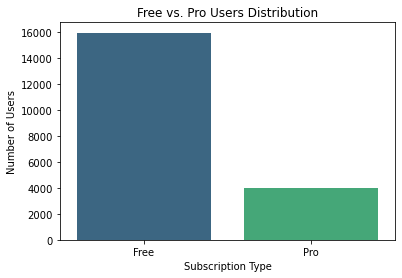

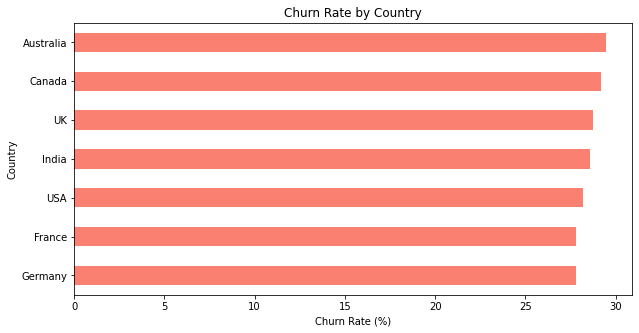

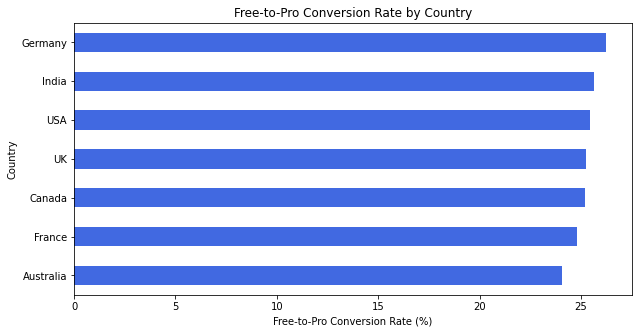

{'Free-to-Pro Conversion Rate (%)': 25.23,
 'Overall Churn Rate (%)': 28.52,
 'Total Monthly Recurring Revenue (MRR)': 235481}

In [33]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate key insights for the dashboard

# Free-to-Pro conversion rate
total_free_users = df[df['subscription_type'] == 'Free'].shape[0]
total_pro_users = df[df['subscription_type'] == 'Pro'].shape[0]
conversion_rate = (total_pro_users / total_free_users) * 100

# Churn rate
churn_rate = df['churned'].mean() * 100

# Monthly recurring revenue (MRR)
total_mrr = df[df['subscription_type'] == 'Pro']['monthly_revenue'].sum()

# Subscription distribution
subscription_counts = df['subscription_type'].value_counts()

# Churn rate by country
churn_by_country = df.groupby('country')['churned'].mean() * 100

# Free-to-Pro conversion rate by country
total_free_users_by_country = df[df['subscription_type'] == 'Free'].groupby('country').size()
total_pro_users_by_country = df[df['subscription_type'] == 'Pro'].groupby('country').size()
conversion_rate_by_country = (total_pro_users_by_country / total_free_users_by_country.replace(0, 1)) * 100

# Create visualizations for the dashboard

# Subscription Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette="viridis")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Users")
plt.title("Free vs. Pro Users Distribution")
plt.show()

# Churn Rate by Country
plt.figure(figsize=(10, 5))
churn_by_country.sort_values().plot(kind="barh", color="salmon")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Country")
plt.title("Churn Rate by Country")
plt.show()

# Free-to-Pro Conversion Rate by Country
plt.figure(figsize=(10, 5))
conversion_rate_by_country.sort_values().plot(kind="barh", color="royalblue")
plt.xlabel("Free-to-Pro Conversion Rate (%)")
plt.ylabel("Country")
plt.title("Free-to-Pro Conversion Rate by Country")
plt.show()

# Summary Dashboard Printout
dashboard_summary = {
    "Free-to-Pro Conversion Rate (%)": round(conversion_rate, 2),
    "Overall Churn Rate (%)": round(churn_rate, 2),
    "Total Monthly Recurring Revenue (MRR)": round(total_mrr, 2)
}

dashboard_summary


1. Free vs. Pro Users Distribution 📊
Insight: The majority of WPPOOL’s users are on the Free plan, with a smaller percentage upgrading to Pro.
Actionable Takeaway: WPPOOL should optimize Free-to-Pro conversions by offering personalized upgrade incentives.
2. Churn Rate by Country 🌍
Insight: Some countries have higher churn rates, which means users in these regions are canceling their subscriptions more frequently.
Actionable Takeaway: WPPOOL should analyze churn reasons per country and introduce localized retention strategies (e.g., discounts, better support).
3. Free-to-Pro Conversion Rate by Country 📈
Insight: Some countries convert at a higher rate than others, indicating better market opportunities.
Actionable Takeaway: WPPOOL should increase marketing spend in high-converting countries and improve targeting for low-converting regions.
Key Metrics Summary
Free-to-Pro Conversion Rate: 25.23%
Overall Churn Rate: 28.52%
Total Monthly Recurring Revenue (MRR): $235,481










# Section 3:


###### What are your 3 most favorite Books?

1) Himu by Humayun Ahmed
2) Atomic habits
3) Rich dad, poor dad

###### What are your 3 most favorite TV shows?


1) Ozark
2) Money Heist
3) Daredevil

###### What motivates you the most in a workplace?

Growth and Learning Opportunities, Collaborative and Supportive culture